In [ ]:
Video Link : https://youtu.be/lV_Z4HbNAx0

PowerTransformer is a scikit-learn preprocessing tool that stabilizes variance and makes numeric features more normally distributed.
This is especially useful for linear and parametric models.


🔹 2️⃣ Why PowerTransformer is Useful
    Reduces skewness → right-skewed numeric features become closer to Gaussian.
    Stabilizes variance → reduces effect of extreme values/outliers.
    Improves linear model performance → coefficients more stable; residuals closer to normal.
    Required for certain algorithms → Linear Regression, Logistic Regression, LDA, Gaussian Naive Bayes (parametric models).
    🔹 Note: Not needed for non-parametric models like Decision Trees, Random Forests, XGBoost.


type:-
1. Box-Cox:-
   *work with Positive values only
   * it Finds a power λ to make feature distribution closer to normal ( we calculate λ )
   * when to use:- When feature > 0, heavily skewed
   formula:-
   xnew​ =xλ−1/λ   c
   xnew​=ln(x),   if λ=0
   
   
2.Yeo-Johnson:--
1. it work with both :- Positive & negative values
2. Extension of Box-Cox; can handle zeros & negatives
3. when to use:- When data has zeros or negative values

formula:-
For x ≥ 0:
xnew​= x+1)λ−1​/ λ if λ=0
xnew​=ln(x+1) if λ=0

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer



df = pd.read_csv('../data/concrete_data.csv')

df.head()

df.shape

df.isnull().sum()

df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
#sperate independent and dependent variable
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


#  craete model, Applying Regression without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.627553179231485

In [ ]:
#aplly cross validation
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))  

#aswe see  r2 score =0.627553179231485 and croos validation( after validate:-0.4609940491662866 ) which is not good.

np.float64(0.4609940491662866)

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/284979817.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


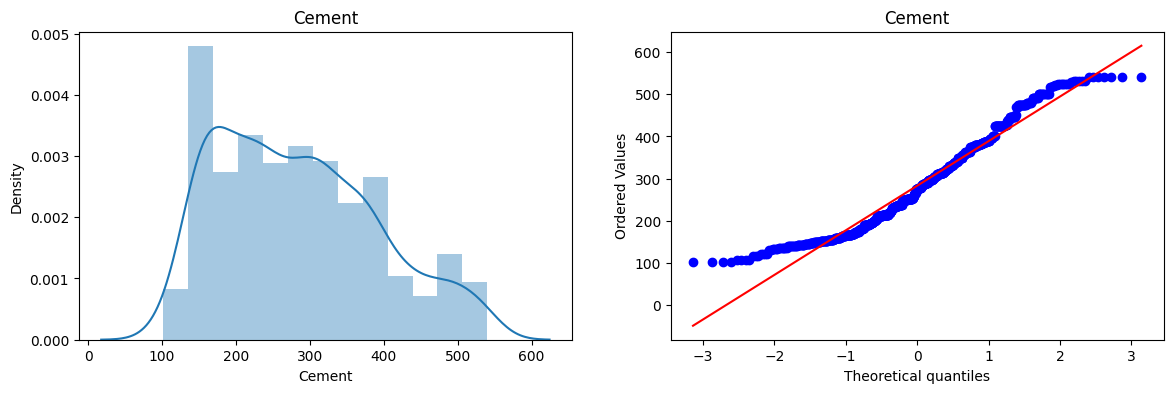

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/284979817.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


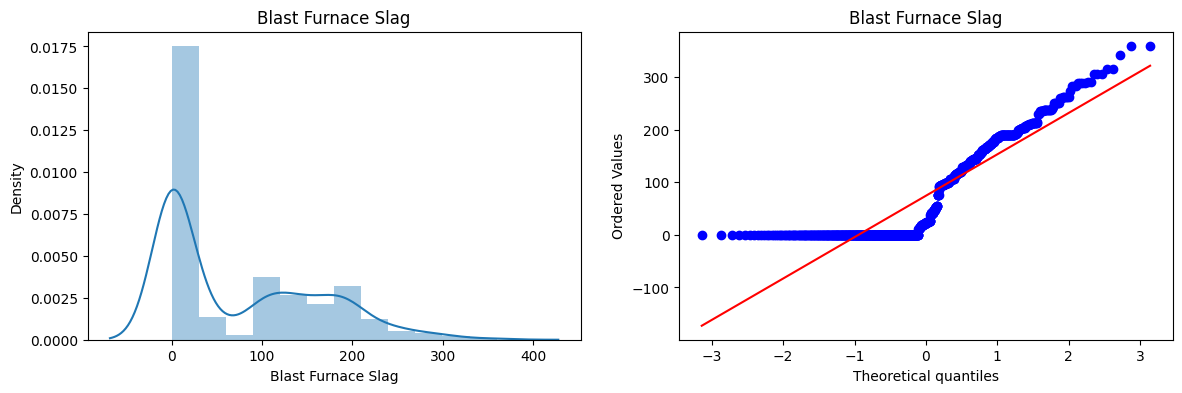

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/284979817.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


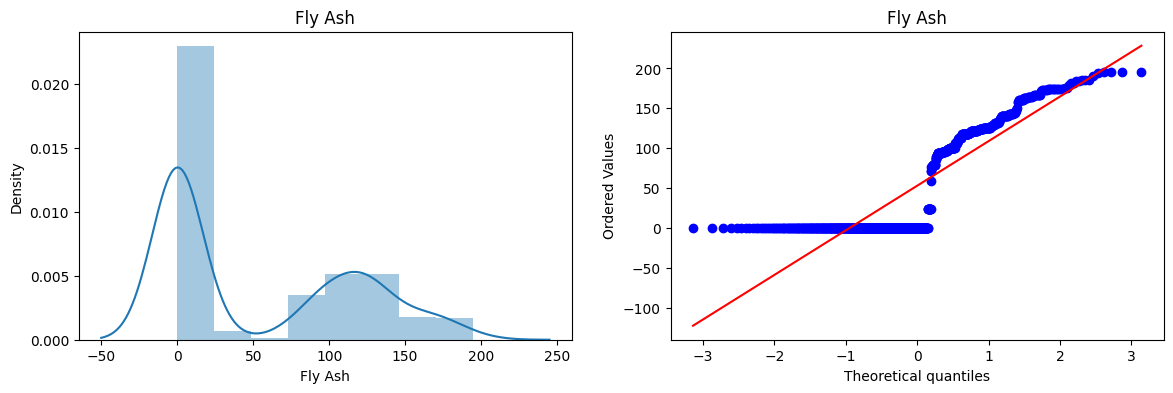

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/284979817.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


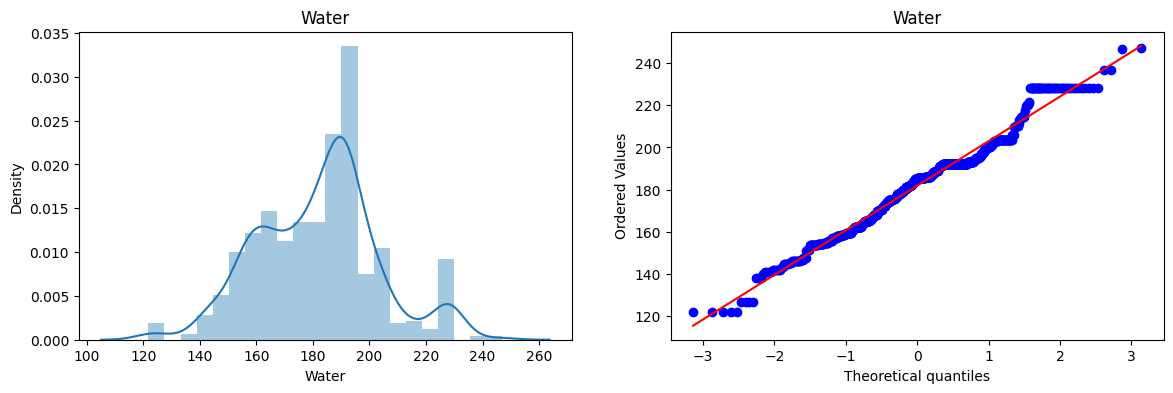

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/284979817.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


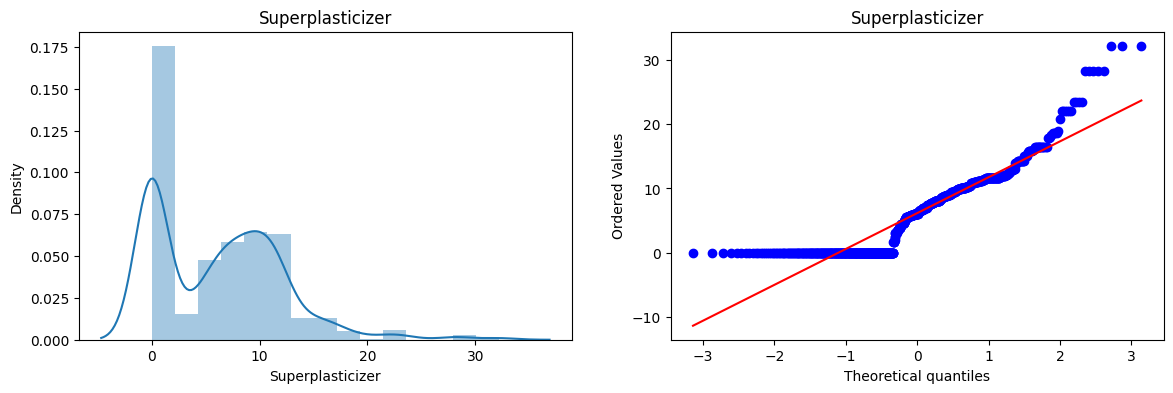

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/284979817.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


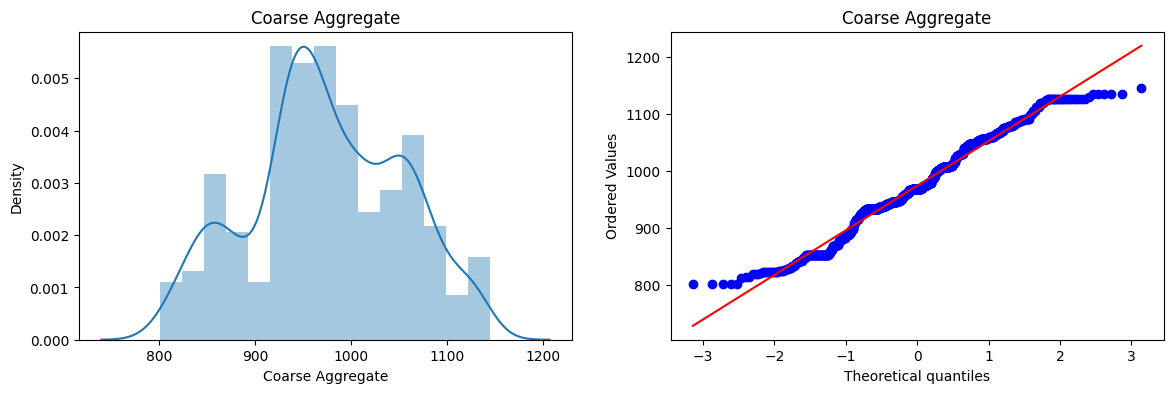

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/284979817.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


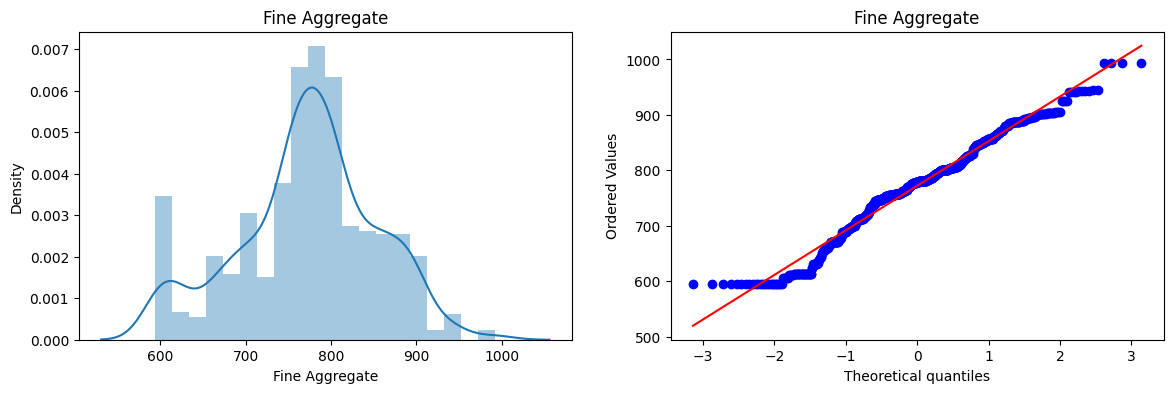

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/284979817.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


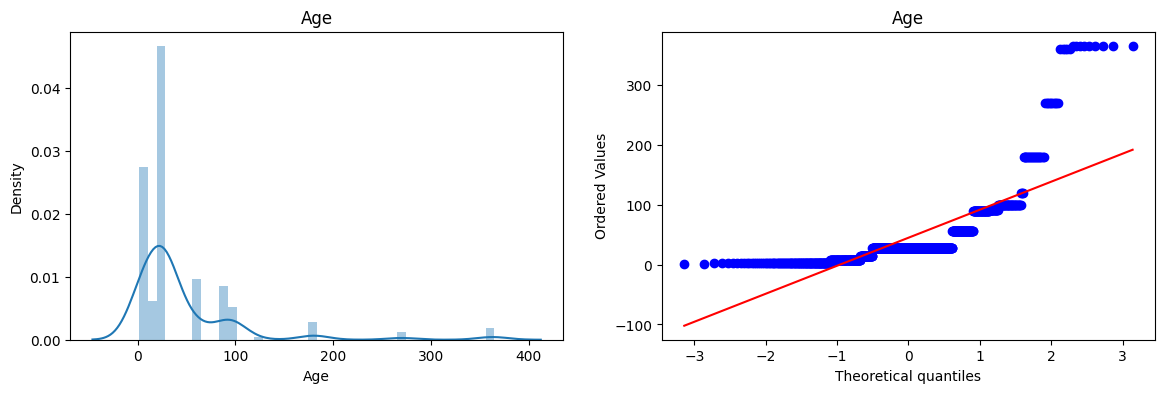

In [8]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()


In [9]:
# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

#to see vlaue in data frame.
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})


# Applying linear regression on transformed data

lr = LinearRegression()

#train model
lr.fit(X_train_transformed,y_train)

#predict model
y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.8047825001905891

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


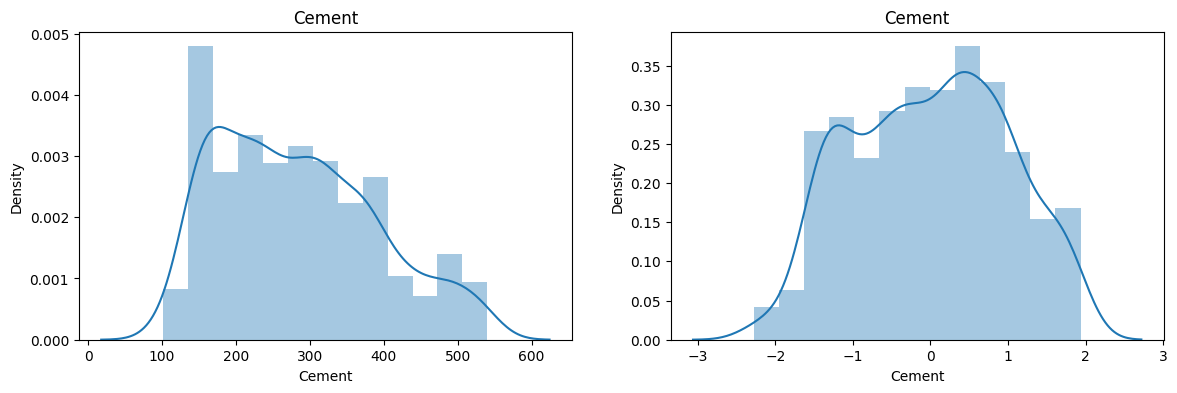

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


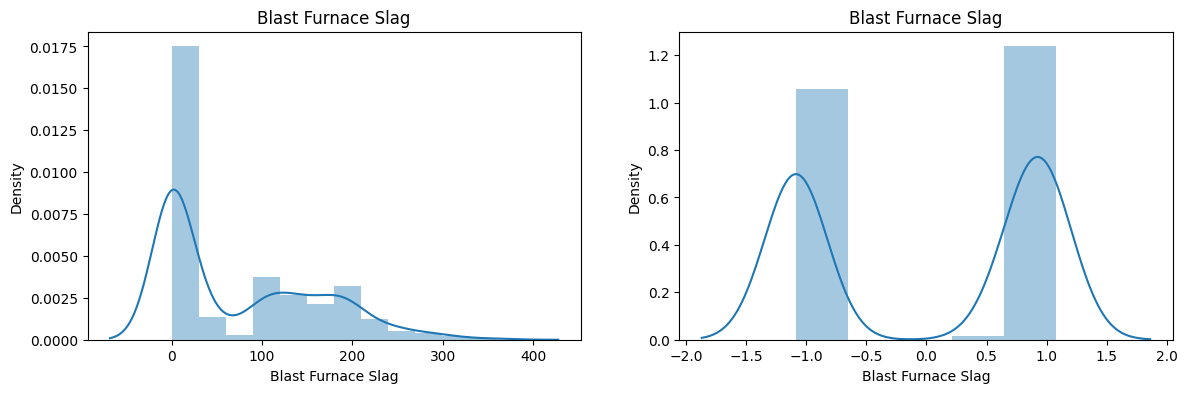

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


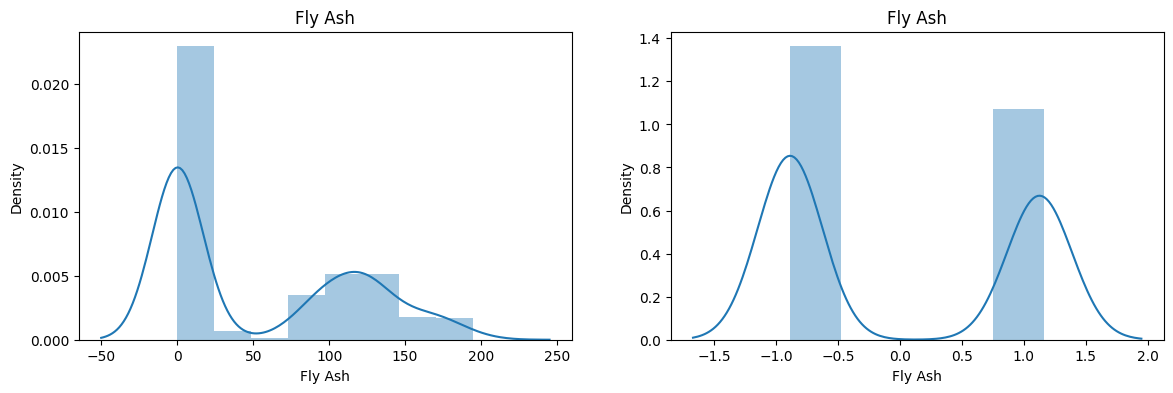

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


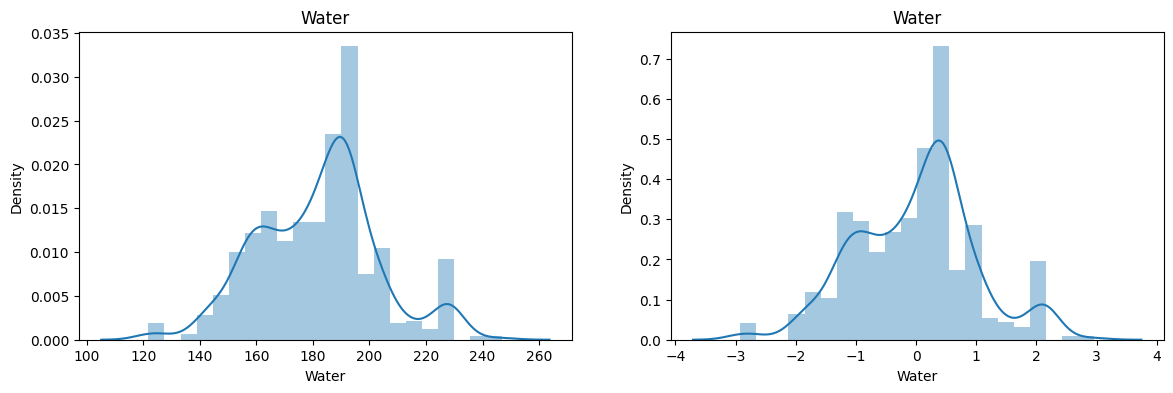

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


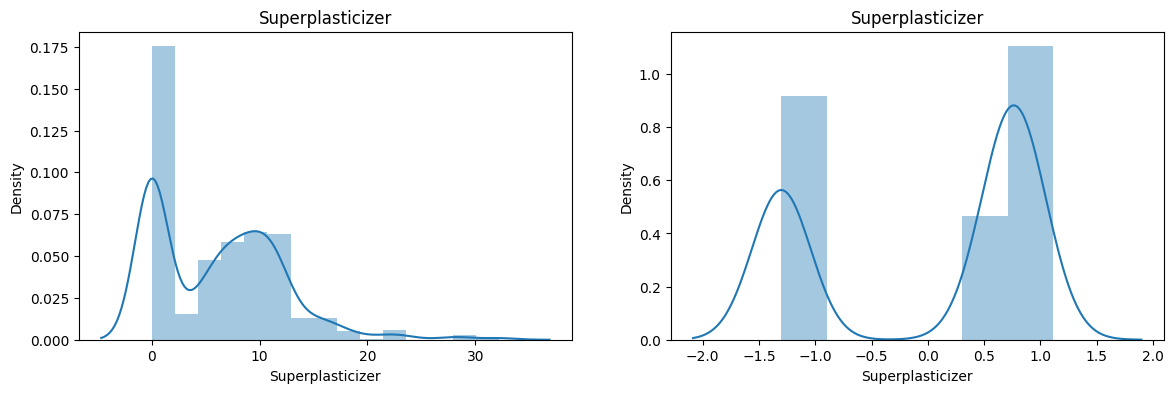

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


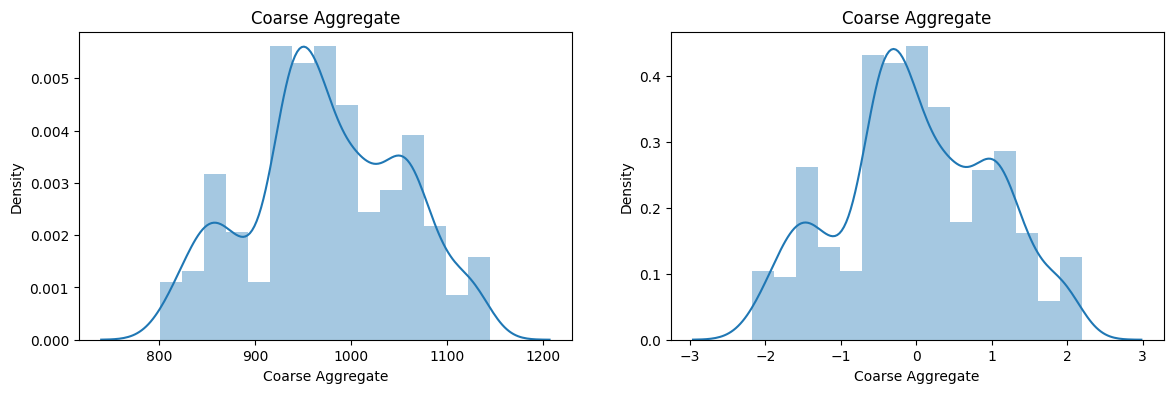

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


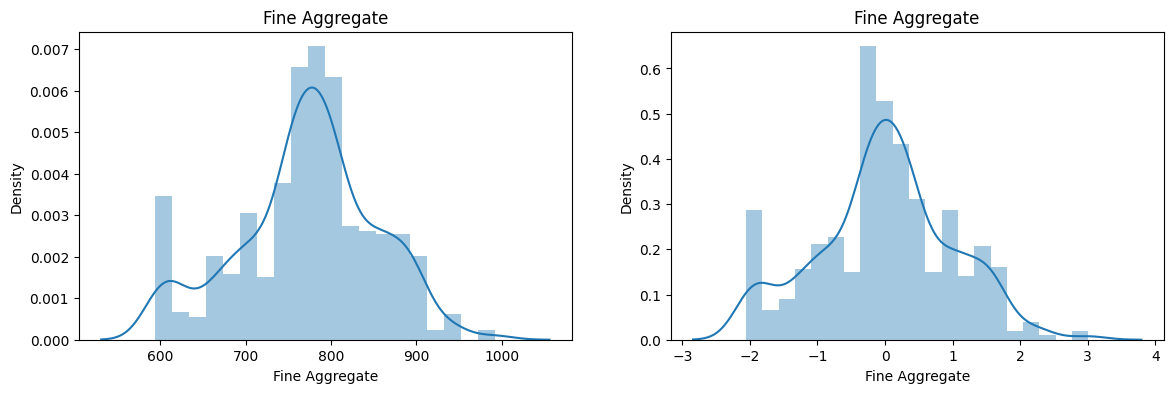

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


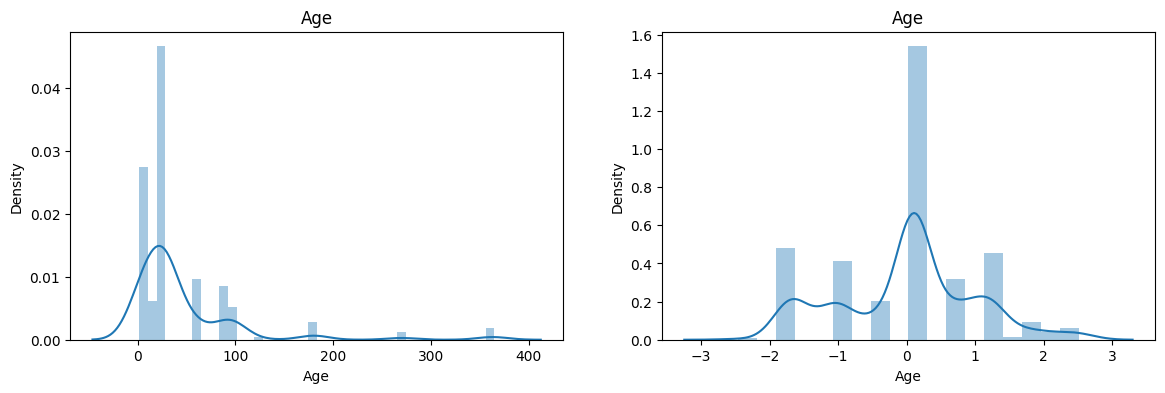

In [ ]:
# Before and after comparision for Box-Cox Plot
#first change in data frame
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

In [23]:
#check with 
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed_johnson = pt1.fit_transform(X_train)
X_test_transformed_ohnson = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed_johnson,y_train)

y_pred3 = lr.predict(X_test_transformed_ohnson)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906508935355


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [21]:
# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

np.float64(0.6834625130236816)

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/2685952403.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_7710/2685952403.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])
/

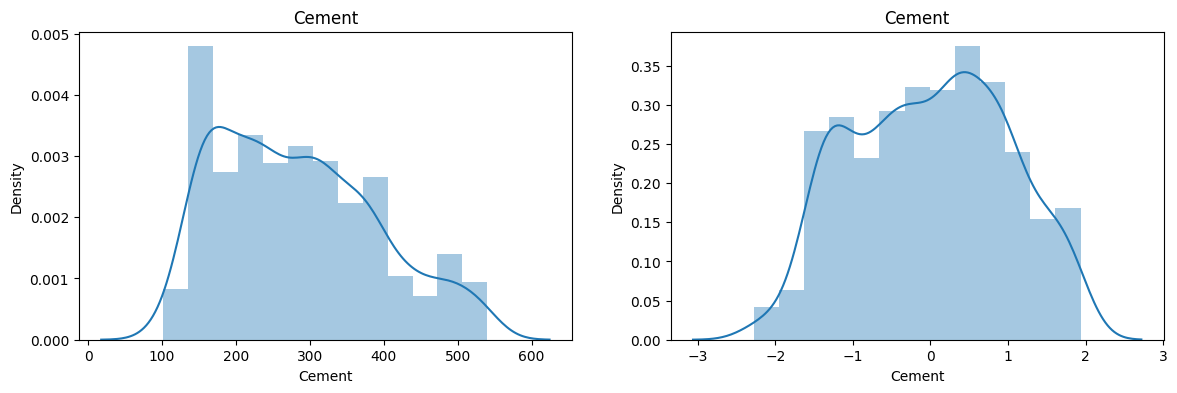

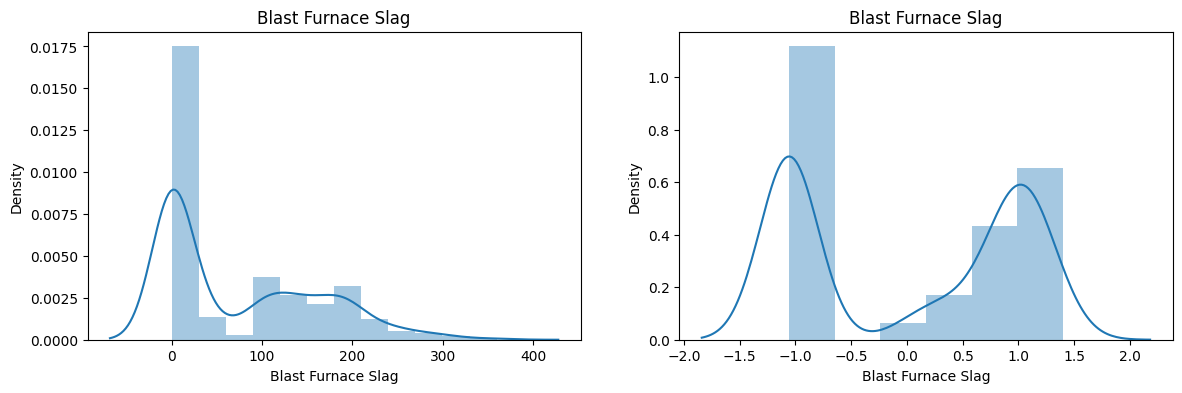

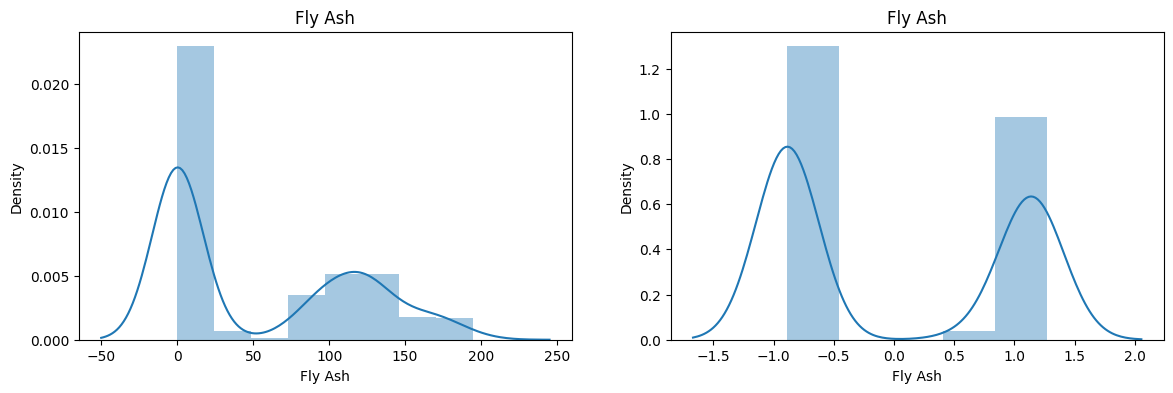

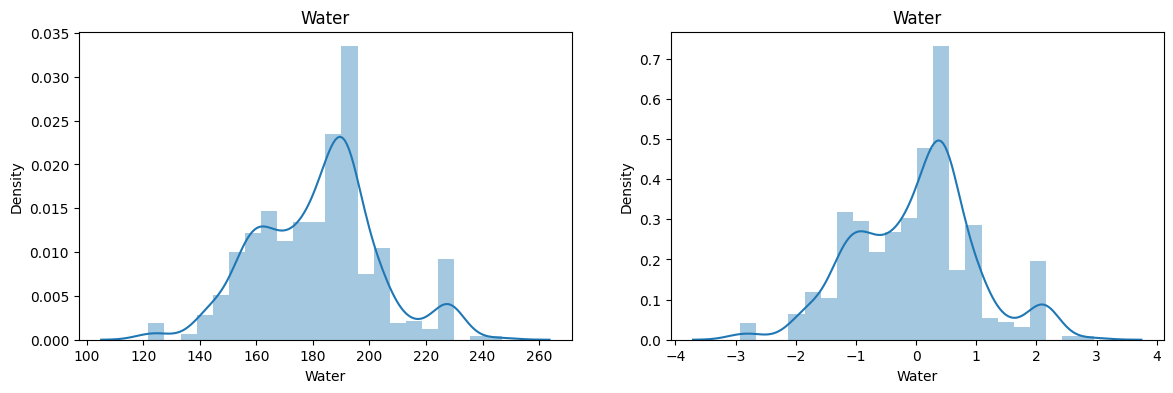

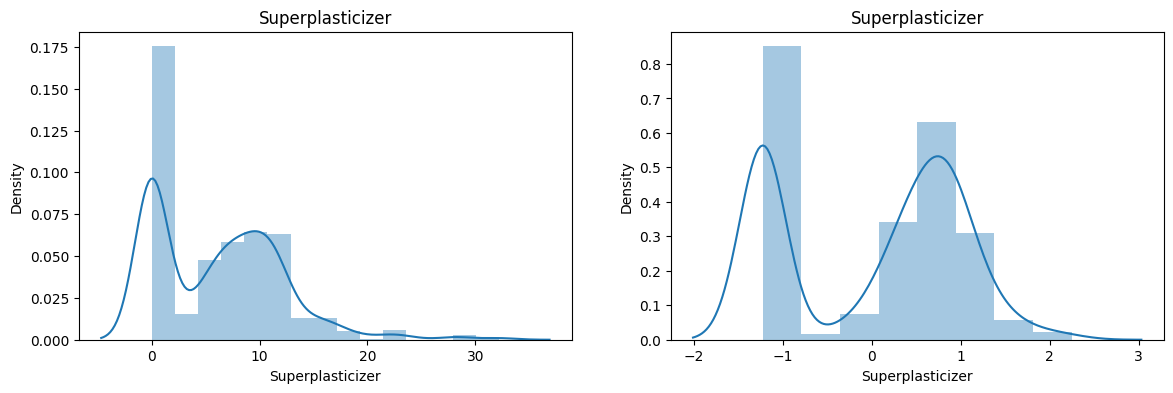

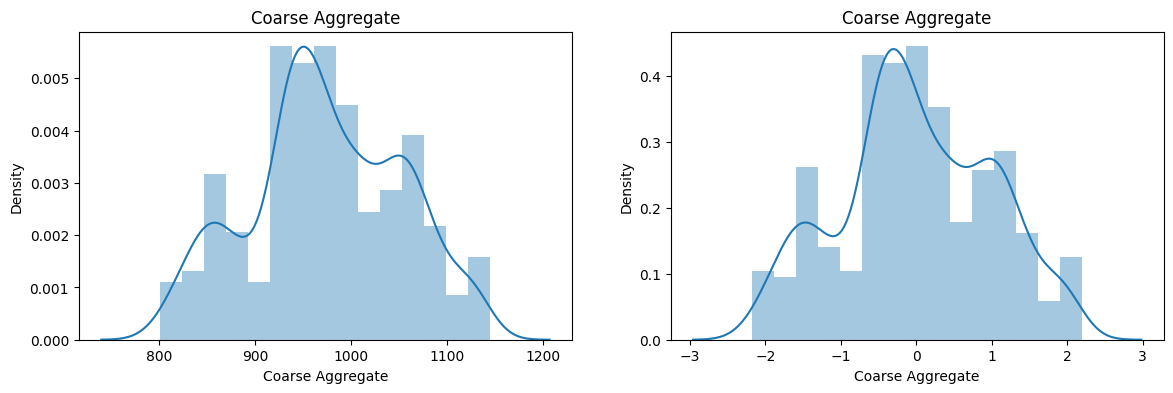

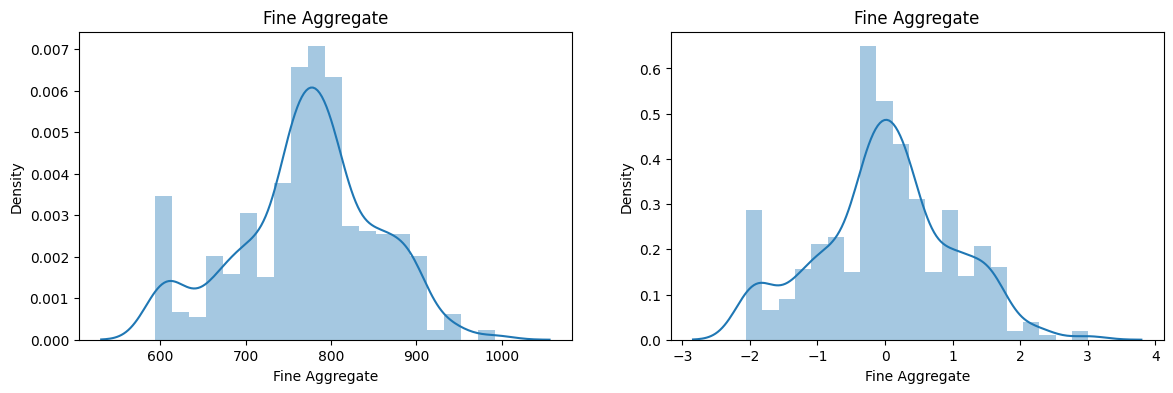

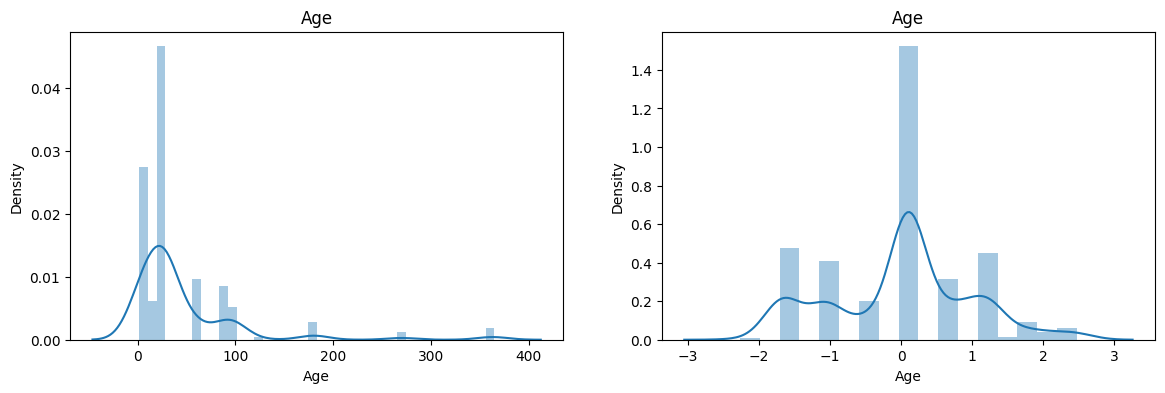

In [26]:
# Before and after comparision for Yeo-Johnson
X_train_transformed = pd.DataFrame(X_train_transformed_johnson,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)


In [27]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830764,1.783100
7,Age,0.001771,0.019885
